In [58]:
df_dictionary = pd.read_csv('CollegeScorecardDataDictionarydata_dictionary.csv')
df_dictionary

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES
0,Unit ID for institution,root,id,integer,UNITID,NaN,NaN,IPEDS,Shown/used on consumer website.
1,8-digit OPE ID for institution,root,ope8_id,integer,OPEID,NaN,NaN,IPEDS,Shown/used on consumer website.
2,6-digit OPE ID for institution,root,ope6_id,integer,OPEID6,NaN,NaN,IPEDS,Shown/used on consumer website.
3,Institution name,school,name,autocomplete,INSTNM,NaN,NaN,IPEDS,Shown/used on consumer website.
4,City,school,city,autocomplete,CITY,NaN,NaN,IPEDS,Shown/used on consumer website.
5,State postcode,school,state,string,STABBR,NaN,NaN,IPEDS,Shown/used on consumer website.
6,ZIP code,school,zip,string,ZIP,NaN,NaN,IPEDS,NaN
7,Accreditor for institution,school,accreditor,string,ACCREDAGENCY,NaN,NaN,FSA,NaN
8,URL for institution's homepage,school,school_url,string,INSTURL,NaN,NaN,IPEDS,Shown/used on consumer website.
9,URL for institution's net price calculator,school,price_calculator_url,string,NPCURL,NaN,NaN,IPEDS,Shown/used on consumer website.


In [59]:
#Author: Datzael Gomez
#Data Dictionary Variables 
'''
Because the data in excel sheet doesn't have well defined variable names it is not easy to know
what data is needed for the analysis, therefore an extra step is needed to 
remove all the unnessary data and translate what each variable signifies using 
a data dictionary that is provided. The end goal is to remove all the unecessary data and change the variable names to 
more definite and understandable names.
'''
import matplotlib
import pandas as pd
import numpy as np
import os
#os.chdir('C:\Users\Lewis\Desktop\scorecard_data')
#load Data dictionay using pandas
df_dictionary = pd.read_csv('CollegeScorecardDataDictionarydata_dictionary.csv')
#only want to look at variable name and their significance
df_translate= df_dictionary[['NAME OF DATA ELEMENT','VARIABLE NAME']]
#Drop any NaN inputs
df_translate= df_translate.dropna()
#save variable indexes
#SAT
x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('SAT')]
#print(x)
y= x.index.get_values()
#ACT
x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('ACT')]
#print(x)
y=np.append(y,x.index.get_values())
y= np.delete(y, 9)
y = np.delete(y,9)
#print(y)
#ethinic
x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('Total share of enrollment of undergraduate degree-seeking students')]
#print(x)
y=np.append(y,x.index.get_values())
#print(y)
#retention rates
x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('First-time, full-time student retention rate at four-year institutions')]
#print(x)
y=np.append(y,x.index.get_values())
#print(y)
#female,male,married,stuff
x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('Share of')]
#print(x)
y=np.append(y,x.index.get_values())
#print(x)
#print(y)
y=y[:-10]
y=np.delete(y,-10)
y=np.delete(y,-9)
y=np.delete(y,-8)
y=np.delete(y,-7)
y=np.delete(y,-6)
#print(y)
#debt
x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('The median debt for')]
#print(x)
y=np.append(y,x.index.get_values())
#print(y)
x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('Enrollment')]
#print(x)
y=np.append(y,x.index.get_values())
#print(y)
y=np.append(y,[3,4,5,6])
y.sort()
df= df_translate.ix[y]
df_names=df['VARIABLE NAME'].tolist()
df2016 = pd.read_csv('MERGED2015_16_PP.csv')
df2016= df2016[df_names]
#print(df2016)
#Need to break everything down into categories 
#Start with ethnicity starts with UDGS
y=[]
df_temp= df.loc[df['VARIABLE NAME'].str.contains('UG')]
y=np.append(y,df_temp.index.get_values())
df_temp= df.loc[df['VARIABLE NAME'].str.contains('CITY')]
y=np.append(y,df_temp.index.get_values())
y.sort()
df_temp= df.ix[y]
ethnic = df_temp['VARIABLE NAME'].tolist()
df_ethnic = df2016[ethnic]
len(y)
m=[]
for i in range(len(y)):
    q = df_ethnic.loc[1].isnull()
    if q[i] == False:
        m=np.append(m,ethnic[i])
df_ethnic= df_ethnic[m]  
df_ethnic.dropna()

C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:80: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,CITY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_MEN,UGDS_WOMEN
0,Normal,4505.0,0.0340,0.9216,0.0058,0.0018,0.0022,0.0018,0.0000,0.0062,0.0266,0.4617,0.5383
1,Birmingham,11269.0,0.5863,0.2541,0.0317,0.0595,0.0023,0.0006,0.0389,0.0181,0.0085,0.4116,0.5884
2,Montgomery,308.0,0.2110,0.3409,0.0195,0.0000,0.0000,0.0032,0.0000,0.0000,0.4253,0.4286,0.5714
3,Huntsville,5829.0,0.7024,0.1230,0.0417,0.0381,0.0130,0.0000,0.0201,0.0317,0.0300,0.5740,0.4260
4,Montgomery,4740.0,0.0165,0.9251,0.0116,0.0032,0.0008,0.0006,0.0114,0.0209,0.0099,0.3850,0.6150
5,Tuscaloosa,31005.0,0.7807,0.1092,0.0399,0.0113,0.0035,0.0009,0.0271,0.0245,0.0029,0.4525,0.5475
6,Alexander City,1546.0,0.7141,0.2600,0.0123,0.0045,0.0019,0.0000,0.0032,0.0019,0.0019,0.4017,0.5983
7,Athens,2904.0,0.7817,0.1185,0.0189,0.0062,0.0152,0.0007,0.0189,0.0055,0.0344,0.3485,0.6515
8,Montgomery,4142.0,0.5355,0.3510,0.0070,0.0241,0.0051,0.0017,0.0316,0.0316,0.0123,0.3595,0.6405
9,Auburn,21551.0,0.8420,0.0671,0.0323,0.0250,0.0063,0.0001,0.0057,0.0131,0.0085,0.5095,0.4905


In [36]:
def names():
    #Author: Datzael Gomez
    #Data Dictionary Variables 
    '''
    Because the data in excel sheet doesn't have well defined variable names it is not easy to know
    what data is needed for the analysis, therefore an extra step is needed to 
    remove all the unnessary data and translate what each variable signifies using 
    a data dictionary that is provided. The end goal is to remove all the unecessary data and change the variable names to 
    more definite and understandable names.
    '''
    import pandas as pd
    import numpy as np
    #load Data dictionay using pandas
    df_dictionary = pd.read_csv('CollegeScorecardDataDictionarydata_dictionary.csv')
    #only want to look at variable name and their significance
    df_translate= df_dictionary[['NAME OF DATA ELEMENT','VARIABLE NAME']]
    #Drop any NaN inputs
    df_translate= df_translate.dropna()
    #save variable indexes
    x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('SAT')]
    y= x.index.get_values()
    x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('ACT')]
    y=np.append(y,x.index.get_values())
    y= np.delete(y, 9)
    y = np.delete(y,9)
    x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('Total share of enrollment of undergraduate degree-seeking students')]
    y=np.append(y,x.index.get_values())
    x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('First-time, full-time student retention rate at four-year institutions')]
    y=np.append(y,x.index.get_values())
    x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('Share of')]
    y=np.append(y,x.index.get_values())
    y=y[:-10]
    y=np.delete(y,-10)
    y=np.delete(y,-9)
    y=np.delete(y,-8)
    y=np.delete(y,-7)
    y=np.delete(y,-6)
    x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('The median debt for')]
    y=np.append(y,x.index.get_values())
    x= df_translate.loc[df_translate['NAME OF DATA ELEMENT'].str.contains('Enrollment')]
    y=np.append(y,x.index.get_values())
    y=np.append(y,[3,4,5,6])
    y.sort()
    df= df_translate.ix[y]
    df_names=df['VARIABLE NAME'].tolist()
    
    return df_names, df

#Author: Datzael Gomez
#Ethnicity function
def ethnicity(m, df_names, df):
    '''
    this function will look at all columns related to ethnicity and remove any nan's and make a new data frame
    '''
    assert isinstance(m,basestring), 'string type only'
    import pandas as pd
    df2016 = pd.read_csv(m)
    df2016= df2016[df_names]
    y=[]
    df_temp= df.loc[df['VARIABLE NAME'].str.contains('UG')]
    y=np.append(y,df_temp.index.get_values())
    df_temp= df.loc[df['VARIABLE NAME'].str.contains('CITY')]
    y=np.append(y,df_temp.index.get_values())
    y.sort()
    df_temp= df.ix[y]
    ethnic = df_temp['VARIABLE NAME'].tolist()
    df_ethnic = df2016[ethnic]
    len(y)
    m=[]
    for i in range(len(y)):
        q = df_ethnic.loc[1].isnull()
        if q[i] == False:
            m=np.append(m,ethnic[i])
    df_ethnic= df_ethnic[m]  
    df_ethnic = df_ethnic.dropna()
    
    return df_ethnic


df_names, df1= names()
ethnicity('MERGED2015_16_PP.csv', df_names, df1)

C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,CITY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_MEN,UGDS_WOMEN
0,Normal,4505.0,0.0340,0.9216,0.0058,0.0018,0.0022,0.0018,0.0000,0.0062,0.0266,0.4617,0.5383
1,Birmingham,11269.0,0.5863,0.2541,0.0317,0.0595,0.0023,0.0006,0.0389,0.0181,0.0085,0.4116,0.5884
2,Montgomery,308.0,0.2110,0.3409,0.0195,0.0000,0.0000,0.0032,0.0000,0.0000,0.4253,0.4286,0.5714
3,Huntsville,5829.0,0.7024,0.1230,0.0417,0.0381,0.0130,0.0000,0.0201,0.0317,0.0300,0.5740,0.4260
4,Montgomery,4740.0,0.0165,0.9251,0.0116,0.0032,0.0008,0.0006,0.0114,0.0209,0.0099,0.3850,0.6150
5,Tuscaloosa,31005.0,0.7807,0.1092,0.0399,0.0113,0.0035,0.0009,0.0271,0.0245,0.0029,0.4525,0.5475
6,Alexander City,1546.0,0.7141,0.2600,0.0123,0.0045,0.0019,0.0000,0.0032,0.0019,0.0019,0.4017,0.5983
7,Athens,2904.0,0.7817,0.1185,0.0189,0.0062,0.0152,0.0007,0.0189,0.0055,0.0344,0.3485,0.6515
8,Montgomery,4142.0,0.5355,0.3510,0.0070,0.0241,0.0051,0.0017,0.0316,0.0316,0.0123,0.3595,0.6405
9,Auburn,21551.0,0.8420,0.0671,0.0323,0.0250,0.0063,0.0001,0.0057,0.0131,0.0085,0.5095,0.4905


In [37]:
#Debt stuff
#Author: Datzael Gomez
#debt function
def debt(m, df_names, df1):
    '''
    this function will look at all columns related to debt and remove any rows that have a privacysuppressed value 
    and make a new data frame
    '''
    assert isinstance(m,basestring), 'string type only'
    import pandas as pd
    df = pd.read_csv(m)
    df= df[df_names]
    y=[]
    df_temp= df1.loc[df1['VARIABLE NAME'].str.contains('DEBT')]
    y=np.append(y,df_temp.index.get_values())
    df_temp= df1.loc[df1['VARIABLE NAME'].str.contains('CITY')]
    y=np.append(y,df_temp.index.get_values())
    df_temp= df1.loc[df1['VARIABLE NAME'].str.contains('INSTNM')]
    y=np.append(y,df_temp.index.get_values())
    y.sort()
    df_temp= df1.ix[y]
    col = df_temp['VARIABLE NAME'].tolist()
    df_debt = df[col]
    len(y)
    m=[]
    for i in range(len(y)):
        q= col
        df_debt=df_debt[df_debt[q[i]] != 'PrivacySuppressed'] 
    df_d= df_debt[m]  
    df_d = df_d.dropna()
    
    
    return df_debt

df_names, df1 = names()
x = debt('MERGED2015_16_PP.csv', df_names, df1)
x

C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,INSTNM,CITY,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN
0,Alabama A & M University,Normal,35000,9500,14457,15000,14250,14250,18998,15500,9500,16000,13750,14307.5,14953
1,University of Alabama at Birmingham,Birmingham,21500,9500,14739,14250,14000,14818.5,13250,17000,11907,14750,13750,14100,14500
2,Amridge University,Montgomery,23000,9500,9500,15750,18469,5500,12500,10713,11791,12500,9500,10500,12500
3,University of Alabama in Huntsville,Huntsville,23500,9377,16750,16083,12500,14403,17460.5,18555,11036.5,15958,14316,15250,15000
4,Alabama State University,Montgomery,32091,11500,15338,15757,15000,15000,18973,16143,9500,16639,14250,16000,15000
5,The University of Alabama,Tuscaloosa,23750,9472,17992,17469.5,17000,17500,16750,19750,14000,17750,16500,18250,17000
6,Central Alabama Community College,Alexander City,9388,6188,7000,6239,4703,4899,10450,6875,5000,7382,5500,7590,5682
7,Athens State University,Athens,18534,8974.5,13000,14076,12500,9856,14791.5,13959,12500,13745,12500,14166,12500
8,Auburn University at Montgomery,Montgomery,22192.5,7406.5,9842,10250,10975.5,9201,12500,10750,7537.5,10750,9500,11000,9500
9,Auburn University,Auburn,21500,7500,16750,19000,16649,17500,16500,20750,14668.5,18500,16250,19000,17000


In [38]:
#Author: Datzael Gomez
#SAT function
def SAT(m, df_names, df1):
    '''
    this function will look at all columns related to SAT scores and remove any nan's and make a new data frame
    '''
    assert isinstance(m,basestring), 'string type only'
    import pandas as pd
    df = pd.read_csv(m)
    df= df[df_names]
    y=[]
    h=[]
    df_temp= df1.loc[df1['VARIABLE NAME'].str.contains('STABBR')]
    y=np.append(y,df_temp.index.get_values())
    df_temp= df1.loc[df1['VARIABLE NAME'].str.contains('SAT')]
    y=np.append(y,df_temp.index.get_values())
    y.sort()
    df_temp= df1.ix[y]
    col = df_temp['VARIABLE NAME'].tolist()
    df_sat = df[col]
    df_sat = df_sat.dropna()
    
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
    
    q=0
    for i in range(len(states)):
         q = np.append(q,df_sat[df_sat['STABBR']== states[i]].index.get_values())
            
    q.sort()
    df_sat= df_sat.ix[q]
    return df_sat

#Author: Datzael Gomez
#ACT function
def ACT(m, df_names, df1):
    '''
    this function will look at all columns related to ACT scores and remove any nan's and make a new data frame
    '''
    assert isinstance(m,basestring), 'string type only'
    import pandas as pd
    df = pd.read_csv(m)
    df= df[df_names]
    y=[]
    h=[]
    df_temp= df1.loc[df1['VARIABLE NAME'].str.contains('STABBR')]
    y=np.append(y,df_temp.index.get_values())
    df_temp= df1.loc[df1['VARIABLE NAME'].str.contains('ACT')]
    y=np.append(y,df_temp.index.get_values())
    y.sort()
    df_temp= df1.ix[y]
    col = df_temp['VARIABLE NAME'].tolist()
    df_act = df[col]
    df_act = df_act.dropna()
    
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
    
    q=0
    for i in range(len(states)):
         q = np.append(q,df_act[df_act['STABBR']== states[i]].index.get_values())
            
    q.sort()
    df_act= df_act.ix[q]
    return df_act

#Author: Datzael
#ACT averages
'''
this function will take in the dataframe from the ACT function and find the average 
ACT cumulative score
'''
def ACTavg(m):
    df_names, df1 = names()
    x= ACT(m, df_names, df1)
    acm=[]
    ac25=[]
    ac75=[]
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

    for i in range(len(states)):
        dft= x[x['STABBR']== states[i]]
        if sum(dft['ACTCMMID'].tolist()) != 0:
            acm.append(sum(dft['ACTCMMID'].tolist())/len(dft['ACTCMMID'].tolist()))
        else: 
            acm.append(sum(dft['ACTCMMID'].tolist()))
    
        if sum(dft['ACTCM25'].tolist()) != 0:
            ac25.append(sum(dft['ACTCM25'].tolist())/len(dft['ACTCM25'].tolist()))
        else: 
            ac25.append(sum(dft['ACTCM25'].tolist()))
    
        if sum(dft['ACTCM75'].tolist()) != 0:
            ac75.append(sum(dft['ACTCM75'].tolist())/len(dft['ACTCM75'].tolist()))
        else: 
            ac75.append(sum(dft['ACTCM75'].tolist()))
    
        
    df_act_avg=[states,acm,ac25,ac75]
    df_act_avg=pd.DataFrame(df_act_avg)

    df_act_avg= df_act_avg.transpose()

    df_act_avg=df_act_avg.rename(index=str, columns={0:"States", 1:"Cumulative Mid",2:"Cumulative 25",
                                                     3:"Cumulative 75"})
    
    return df_act_avg
#Author: Datzael
#SAT averages
'''
this function will take in the dataframe from the SAT function and find the average 
SAT score of each subject
'''
def SATavg(m):
    df_names, df1 = names()
    x= SAT(m, df_names, df1)
    srm=[]
    sr25=[]
    sr75=[]
    smm=[]
    sm25=[]
    sm75=[]
    swm=[]
    sw25=[]
    sw75=[]
    r=[]
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
    for i in range(len(states)):
        dft= x[x['STABBR']== states[i]]
        if sum(dft['SATVRMID'].tolist()) != 0:
            srm.append(sum(dft['SATVRMID'].tolist())/len(dft['SATVRMID'].tolist()))
        else: 
            srm.append(sum(dft['SATVRMID'].tolist()))
    
        if sum(dft['SATMTMID'].tolist()) != 0:
            smm.append(sum(dft['SATMTMID'].tolist())/len(dft['SATMTMID'].tolist()))
        else: 
            smm.append(sum(dft['SATMTMID'].tolist()))
    
        if sum(dft['SATWRMID'].tolist()) != 0:
            swm.append(sum(dft['SATWRMID'].tolist())/len(dft['SATWRMID'].tolist()))
        else: 
            swm.append(sum(dft['SATWRMID'].tolist()))
    
        if sum(dft['SATVR25'].tolist()) != 0:
            sr25.append(sum(dft['SATVR25'].tolist())/len(dft['SATVR25'].tolist()))
        else: 
            sr25.append(sum(dft['SATVR25'].tolist()))
    
        if sum(dft['SATMTMID'].tolist()) != 0:
            sm25.append(sum(dft['SATMT25'].tolist())/len(dft['SATMT25'].tolist()))
        else: 
            sm25.append(sum(dft['SATMT25'].tolist()))
    
        if sum(dft['SATWR25'].tolist()) != 0:
            sw25.append(sum(dft['SATWR25'].tolist())/len(dft['SATWR25'].tolist()))
        else: 
            sw25.append(sum(dft['SATWR25'].tolist()))
        
        if sum(dft['SATVR75'].tolist()) != 0:
            sr75.append(sum(dft['SATVR75'].tolist())/len(dft['SATVR75'].tolist()))
        else: 
            sr75.append(sum(dft['SATVR75'].tolist()))
    
        if sum(dft['SATMTMID'].tolist()) != 0:
            sm75.append(sum(dft['SATMT75'].tolist())/len(dft['SATMT75'].tolist()))
        else: 
            sm75.append(sum(dft['SATMT75'].tolist()))
    
        if sum(dft['SATWRMID'].tolist()) != 0:
            sw75.append(sum(dft['SATWR75'].tolist())/len(dft['SATWR75'].tolist()))
        else: 
            sw75.append(sum(dft['SATWR75'].tolist()))
        
    df_sat_avg=[states,srm,sr25,sr75,smm,sm25,sm75,swm,sw25,sw75]
    df_sat_avg=pd.DataFrame(df_sat_avg)

    df_sat_avg= df_sat_avg.transpose()

    df_sat_avg=df_sat_avg.rename(index=str, columns={0:"States", 1:"Reading Mid",2:"Reading 25",
                                                     3:"Reading 75",4:"Math Mid",5:"Math 25",6:"Math 75",
                                                     7:"Writing Mid",8:"Writing 25",9:"Writing 75"})
    
    return df_sat_avg


C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,States,Reading Mid,Reading 25,Reading 75,Math Mid,Math 25,Math 75,Writing Mid,Writing 25,Writing 75
0,AL,516.273,457.364,575,502.091,435,569.091,496,440,551.727
1,AK,519,447.5,590,512.5,447.5,577.5,482.5,420,545
2,AZ,510,440,580,515,460,570,505,430,580
3,AR,489.3,437.8,540.8,485.4,441.7,529,464.2,415.5,512.6
4,CA,570.34,515.18,625.42,583.62,526.62,640.56,570.54,518.36,622.6
5,CO,593.333,543.333,643.333,610,560,660,570,523.333,616.667
6,CT,520.25,471.25,569.167,527.333,474.583,580,518.167,467.083,569.167
7,DC,611.667,560,663.333,601.667,550,653.333,605,556.667,653.333
8,DE,485,440,530,490,440,540,472.333,427.667,516.667
9,FL,535.786,485.893,585.643,529.143,479.821,578.393,516.393,466.786,566


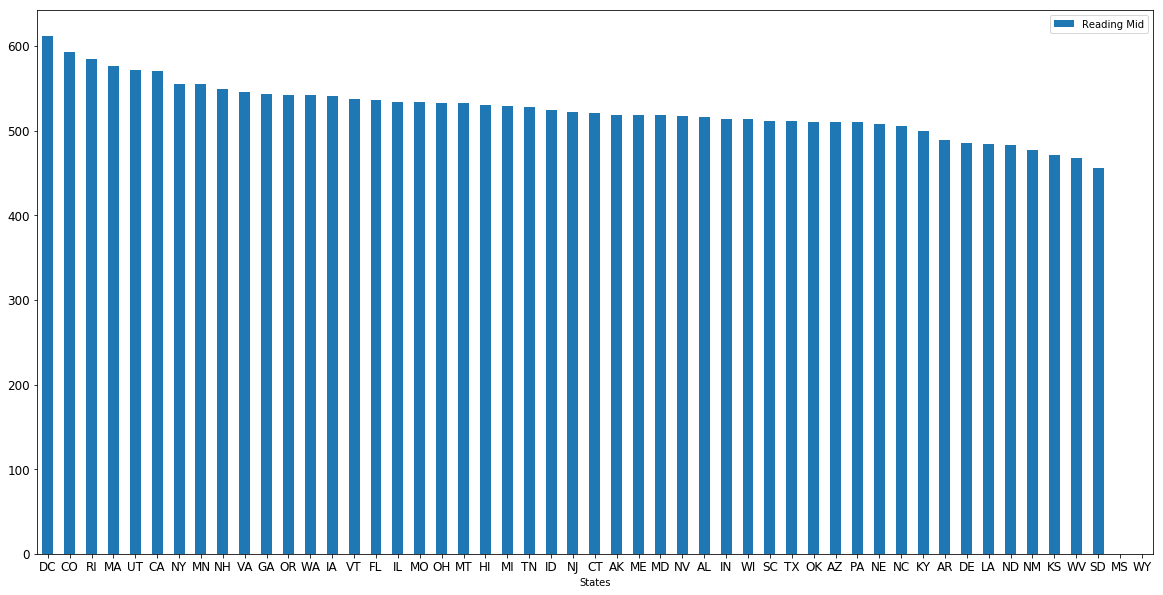

In [47]:
#auther: CLK
import pandas as pd
df = SATavg('MERGED2015_16_PP.csv')
ax = df.sort_values('Reading Mid', ascending=False).plot.bar(x='States',y='Reading Mid',rot=0,figsize=(20,10), fontsize=12)

import os 
#os.chdir('C:\Users\Lewis\Desktop\scorecard_data')
SATavg('MERGED2015_16_PP.csv')


In [51]:
df.sort_values('Reading Mid', ascending=False)
df.sort_values('Reading Mid', ascending=False)

,States,Reading Mid,Reading 25,Reading 75,Math Mid,Math 25,Math 75,Writing Mid,Writing 25,Writing 75
7,DC,611.667,560,663.333,601.667,550,653.333,605,556.667,653.333
5,CO,593.333,543.333,643.333,610,560,660,570,523.333,616.667
39,RI,585,530,640,595,540,650,585,535,635
21,MA,575.857,525.571,626.086,584.571,534.857,634.286,569.571,520.857,618.286
44,UT,571.667,506.667,636.667,575,513.333,636.667,555,493.333,616.667
4,CA,570.34,515.18,625.42,583.62,526.62,640.56,570.54,518.36,622.6
32,NY,555.643,504,607.262,563.024,512.381,613.595,547.762,497.143,598.333
23,MN,555.438,494.375,616.438,554.5,491.438,617.438,543.312,487.062,599.375
29,NH,549,498,600,548,494,602,542,492,592
46,VA,545.038,490,600,535.077,482.5,587.615,520.346,465,575.692


C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


AxesSubplot(0.125,0.125;0.775x0.755)


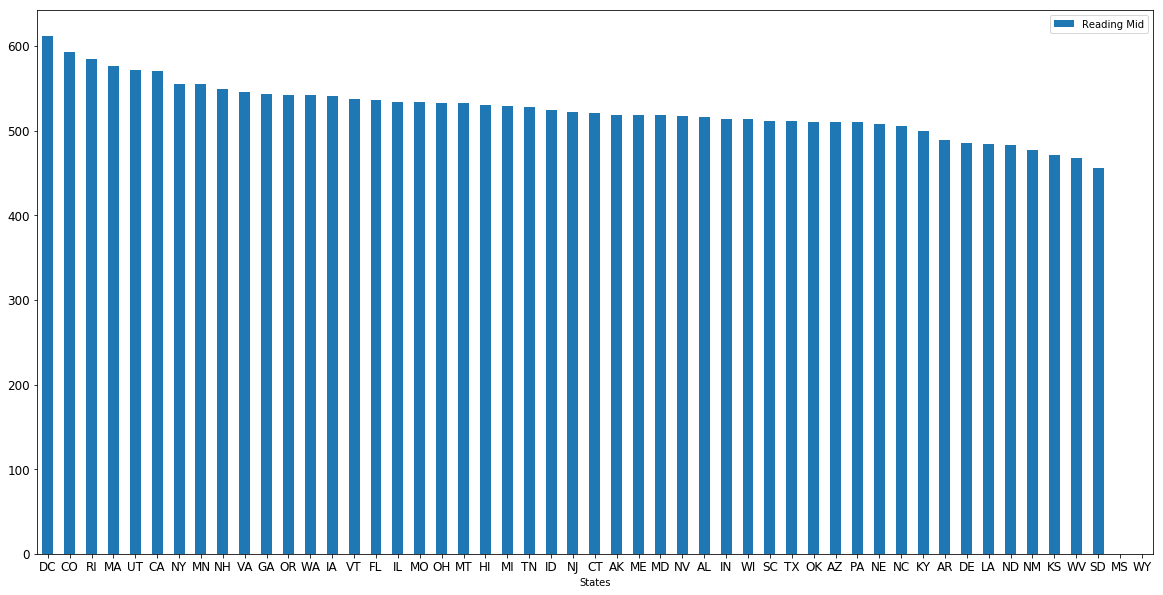

In [48]:
'''
Auther: Chen-Lin Ko
'''
%matplotlib inline

import pandas as pd
def drawingbarchart(df,col='Reading Mid'):
    return df.sort_values(col, ascending=False).plot.bar(x='States',y=col,rot=0,figsize=(20,10), fontsize=12)

df = SATavg('MERGED2015_16_PP.csv')
a = drawingbarchart(df,col='Reading Mid')
print(a)

In [41]:
ACTavg('MERGED2015_16_PP.csv')

C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:78: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,States,Cumulative Mid,Cumulative 25,Cumulative 75
0,AL,23.25,20,25.75
1,AK,22,18,26
2,AZ,0,0,0
3,AR,27,24,30
4,CA,26.1875,23.6875,28.125
5,CO,29,27,31
6,CT,22,20,24
7,DC,28.5,26.5,30.5
8,DE,27,24,29
9,FL,24.0556,21.6111,26.2222


C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ericm\Anaconda2\lib\site-packages\ipykernel_launcher.py:78: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


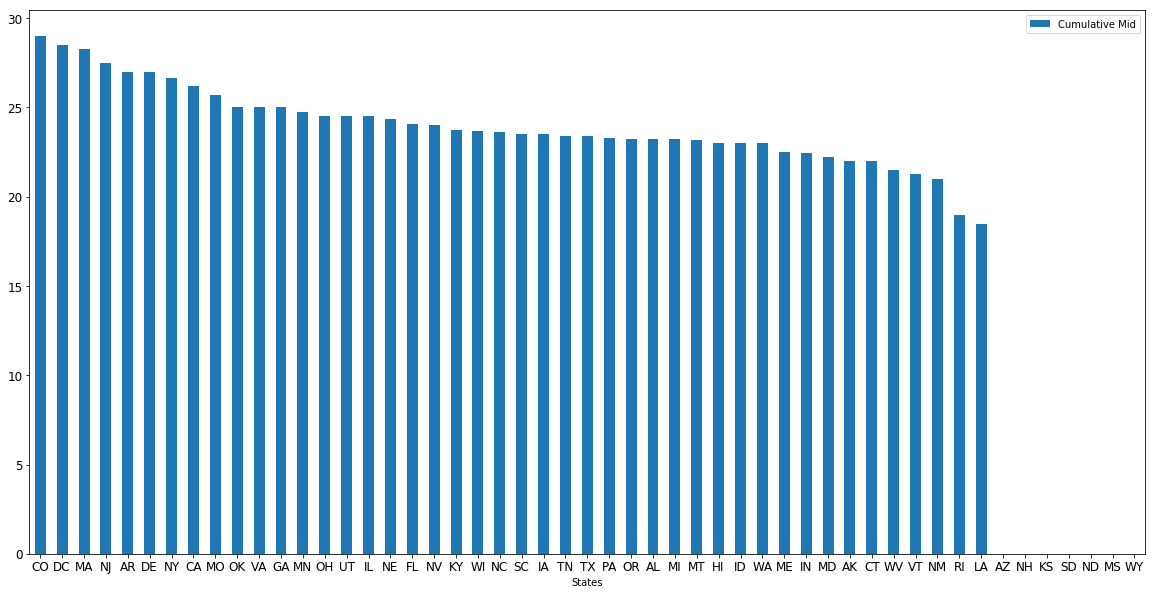

In [42]:
%matplotlib inline

df = ACTavg('MERGED2015_16_PP.csv')
drawingbarchart(df,col='Cumulative Mid')

In [45]:
df

,States,Cumulative Mid,Cumulative 25,Cumulative 75
0,AL,23.25,20,25.75
1,AK,22,18,26
2,AZ,0,0,0
3,AR,27,24,30
4,CA,26.1875,23.6875,28.125
5,CO,29,27,31
6,CT,22,20,24
7,DC,28.5,26.5,30.5
8,DE,27,24,29
9,FL,24.0556,21.6111,26.2222


In [55]:
df_names

['INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'UGDS',
 'UG',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'UGDS_WHITENH',
 'UGDS_BLACKNH',
 'UGDS_API',
 'UGDS_AIANOLD',
 'UGDS_HISPOLD',
 'RET_FT4',
 'GRAD_DEBT_MDN',
 'WDRAW_DEBT_MDN',
 'LO_INC_DEBT_MDN',
 'MD_INC_DEBT_MDN',
 'HI_INC_DEBT_MDN',
 'DEP_DEBT_MDN',
 'IND_DEBT_MDN',
 'PELL_DEBT_MDN',
 'NOPELL_DEBT_MDN',
 'FEMALE_DEBT_MDN',
 'MALE_DEBT_MDN',
 'FIRSTGEN_DEBT_MDN',
 'NOTFIRSTGEN_DEBT_MDN',
 'FEMALE',
 'MARRIED',
 'DEPENDENT',
 'VETERAN',
 'FIRST_GEN',
 'UGDS_MEN',
 'UGDS_WOMEN',
 'RET_FT4_POOLED',
 'RET_FT4_POOLED_SUPP']